### **PREDIÇÃO POR AM - DADOS DO HOSPITAL SÍRIO-LIBANÊS (HSL)**



Data: 22/10/2021

Filipe Loyola Lopes





Informativo: 

GRUPO_0 - pacientes com exames provindos apenas do pronto socorro (NÃO_GRAVE); 

GRUPO_1 - pacientes com exames provindos do pronto socorro e internação (NÃO_GRAVE);

GRUPO_2 - pacientes com exames provindos do pronto socorro e UTI (GRAVE).

GRUPO_3 - pacientes com exames provindos do pronto socorro, internação e UTI (GRAVE).

# **Conjunto 1: APENAS GRUPO 0 (NÃO GRAVE) E GRUPO 3 (GRAVE)**

In [1]:
#Bibliotecas

import numpy as np
import pandas as pd
from pandas import DataFrame
import csv
from numpy import mean
from numpy import std
from numpy import correlate
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from google.colab import files
import datetime as dt
from matplotlib import pyplot as plt
plt.style.use('default')
import seaborn as sns
import warnings
import datetime as dt
from datetime import date

import math
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, SelectKBest, SelectPercentile

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer

from sklearn.ensemble import RandomForestClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **IMPORTAÇÃO DOS DADOS**

In [3]:
df_sirio = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2021 dezembro Artigo/AM/sirio_aprendizado_v3.csv', sep='|', encoding='utf-8')
print(df_sirio.shape)
df_sirio.head(3)

(4320, 33)


,Unnamed: 0,ID_PACIENTE,GRUPO,Idade,Sexo,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO
0,0,00017961865C4F766FDBB3CD8FE0BFB0,GRUPO_0,54,M,26.0,24.0,40.0,0.6,34.5,1.02,60.0,0.9,4.65,29.7,40.0,13.8,6440.0,1000.0,15.5,320.0,5.0,5020.0,78.0,176000.0,4.0,0.11,13.1,138.0,35.0,86.0,9.8,1
1,1,000F0BC139D2846DB86AA32B8F05B215,GRUPO_0,41,M,NaN,NaN,20.0,0.4,33.2,1.04,160.0,3.4,4.71,27.6,39.2,13.0,4730.0,2360.0,49.9,420.0,8.9,1770.0,37.4,279000.0,4.3,NaN,14.0,142.0,33.0,83.2,10.0,1
2,2,0028785949D91BD93442838FC898E229,GRUPO_0,31,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
df_sirio = df_sirio.drop(columns=(['Unnamed: 0', 'Sexo']))
print(df_sirio.shape)
df_sirio.head(1)

(4320, 31)


,ID_PACIENTE,GRUPO,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO
0,00017961865C4F766FDBB3CD8FE0BFB0,GRUPO_0,54,26.0,24.0,40.0,0.6,34.5,1.02,60.0,0.9,4.65,29.7,40.0,13.8,6440.0,1000.0,15.5,320.0,5.0,5020.0,78.0,176000.0,4.0,0.11,13.1,138.0,35.0,86.0,9.8,1


In [5]:
cenario1 = df_sirio

cenario1.drop(cenario1.loc[cenario1['GRUPO']=='GRUPO_1'].index, inplace=True)

cenario1.drop(cenario1.loc[cenario1['GRUPO']=='GRUPO_2'].index, inplace=True)

print('GRUPO_0: ', cenario1[cenario1['GRUPO']=='GRUPO_0'].shape)

print('GRUPO_1: ', cenario1[cenario1['GRUPO']=='GRUPO_1'].shape)

print('GRUPO_2: ', cenario1[cenario1['GRUPO']=='GRUPO_2'].shape)

print('GRUPO_3: ', cenario1[cenario1['GRUPO']=='GRUPO_3'].shape)

GRUPO_0:  (3393, 31)
GRUPO_1:  (0, 31)
GRUPO_2:  (0, 31)
GRUPO_3:  (309, 31)


### **CRIANDO COLUNA GRAVIDADE (TARGET)**

GRAVE -> 1

NÃO GRAVE -> 0

*   Item da lista
*   Item da lista



In [6]:
d_2 = {'GRUPO_3' : 1, 'GRUPO_0':0}
cenario1['GRAVIDADE'] = cenario1['GRUPO'].map(d_2) #colocando 0 e 1 na coluna target
cenario1.head(6)

,ID_PACIENTE,GRUPO,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,GRAVIDADE
0,00017961865C4F766FDBB3CD8FE0BFB0,GRUPO_0,54,26.0,24.0,40.0,0.6,34.5,1.02,60.0,0.9,4.65,29.7,40.0,13.8,6440.0,1000.0,15.5,320.0,5.0,5020.0,78.0,176000.0,4.0,0.11,13.1,138.0,35.0,86.0,9.8,1,0
1,000F0BC139D2846DB86AA32B8F05B215,GRUPO_0,41,NaN,NaN,20.0,0.4,33.2,1.04,160.0,3.4,4.71,27.6,39.2,13.0,4730.0,2360.0,49.9,420.0,8.9,1770.0,37.4,279000.0,4.3,NaN,14.0,142.0,33.0,83.2,10.0,1,0
2,0028785949D91BD93442838FC898E229,GRUPO_0,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
3,002B919CC409B11DE52FB212379BE2CB,GRUPO_0,41,26.0,26.0,40.0,0.6,32.9,0.73,240.0,3.4,4.69,29.0,41.4,13.6,7050.0,1630.0,23.1,590.0,8.4,4550.0,64.5,275000.0,NaN,0.12,13.3,NaN,30.0,88.3,11.2,0,0
4,003051C9B19101D1C10C5DC654384017,GRUPO_0,36,27.0,18.0,10.0,0.3,33.4,0.97,30.0,0.9,4.97,28.0,41.6,13.9,3240.0,1390.0,42.9,250.0,7.7,1560.0,48.2,231000.0,4.2,0.08,14.4,139.0,16.0,83.7,10.4,1,0
6,004688799FD293C3ABE0A07209FD8B75,GRUPO_3,68,31.0,21.0,30.0,0.4,32.5,2.07,170.0,2.1,4.89,31.5,47.4,15.4,7940.0,1880.0,23.7,400.0,5.0,5460.0,68.8,215000.0,4.8,0.13,13.6,142.0,68.0,96.9,10.4,1,1


In [7]:
cenario1 = cenario1.drop(columns=['GRUPO'])

### **SEPARANDO GRUPOS PARA TREINO E GRUPOS PARA TESTE**

In [8]:
#obs: apagar coluna GRAVIDADE depois

X_train, X_test, y_train, y_test = train_test_split(cenario1.drop(['ID_PACIENTE'], axis=1), cenario1['GRAVIDADE'],
                                                    test_size = 0.3, random_state=0)
print('Dados de treino {}'.format(X_train.shape))
print('\n')
print("Dados de teste{}". format(X_test.shape))

Dados de treino (2591, 30)


Dados de teste(1111, 30)


In [9]:
y_train[y_train == 0].shape

(2368,)

In [10]:
y_train[y_train == 1].shape

(223,)

In [11]:
y_test[y_test == 0].shape

(1025,)

In [12]:
y_test[y_test == 1].shape

(86,)

In [13]:
X_train.head(20)

,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,GRAVIDADE
931,71,NaN,NaN,20.0,0.4,34.0,0.86,20.0,0.4,5.47,29.6,47.7,16.2,4500.0,1880.0,41.8,430.0,9.6,2150.0,47.8,160000.0,4.0,1.29,13.0,140.0,26.0,87.2,9.8,1,0
3919,40,NaN,NaN,20.0,1.0,32.7,0.90,20.0,1.0,4.21,31.1,40.1,13.1,1910.0,490.0,25.7,200.0,10.5,1180.0,61.8,207000.0,4.2,0.47,12.4,141.0,17.0,95.2,10.1,1,0
4300,33,9.0,14.0,10.0,0.2,34.4,0.69,40.0,0.8,3.89,30.8,34.9,12.0,5100.0,2790.0,54.7,520.0,10.2,1740.0,34.1,247000.0,3.8,1.39,12.2,139.0,28.0,89.7,10.4,0,0
923,25,NaN,NaN,20.0,0.3,33.1,NaN,90.0,1.4,4.60,29.8,41.4,13.7,6430.0,1960.0,30.5,490.0,7.6,3870.0,60.2,253000.0,NaN,NaN,12.7,NaN,NaN,90.0,10.4,0,0
1159,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1445,76,19.0,26.0,20.0,0.3,33.5,0.84,0.0,0.0,4.73,30.2,42.7,14.3,7010.0,840.0,12.0,830.0,11.8,5320.0,75.9,159000.0,4.1,0.73,12.0,137.0,29.0,90.3,10.7,0,0
1910,59,NaN,NaN,20.0,0.5,32.7,0.94,140.0,3.2,5.00,30.2,46.2,15.1,4370.0,1620.0,37.1,730.0,16.7,1860.0,42.5,192000.0,NaN,0.15,13.1,NaN,NaN,92.4,10.1,1,0
882,31,11.0,17.0,20.0,0.3,31.3,0.59,60.0,0.9,4.75,24.2,36.7,11.5,6480.0,1790.0,27.6,690.0,10.6,3930.0,60.6,417000.0,NaN,NaN,13.9,NaN,NaN,77.3,10.6,0,0
2865,36,11.0,13.0,30.0,0.4,33.6,0.96,160.0,2.4,4.31,31.1,39.9,13.4,6760.0,1500.0,22.2,350.0,5.2,4720.0,69.8,222000.0,3.6,0.80,12.7,139.0,14.0,92.6,10.6,0,0
2276,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [14]:
y_train.head(3)

931     0
3919    0
4300    0
Name: GRAVIDADE, dtype: int64

In [15]:
X_test.head(3)

,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,GRAVIDADE
624,38,23.0,24.0,60.0,0.6,32.7,0.76,70.0,0.7,4.63,27.6,39.2,12.8,10000.0,2000.0,20.0,660.0,6.6,7210.0,72.1,334000.0,NaN,NaN,13.8,NaN,NaN,84.7,11.1,0,0
2746,85,8.0,16.0,10.0,0.2,32.0,0.97,20.0,0.4,3.95,28.1,34.7,11.1,5030.0,960.0,19.1,830.0,16.5,3210.0,63.8,246000.0,4.3,1.81,13.5,135.0,39.0,87.8,8.7,0,0
1259,43,NaN,NaN,70.0,1.3,33.5,NaN,100.0,1.8,3.90,31.3,36.4,12.2,5460.0,1690.0,31.0,450.0,8.2,3150.0,57.7,225000.0,NaN,NaN,12.3,NaN,NaN,93.3,9.9,0,0


In [16]:
y_test.head(3)

624     0
2746    0
1259    0
Name: GRAVIDADE, dtype: int64

In [17]:
X_train.head(20)

,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,GRAVIDADE
931,71,NaN,NaN,20.0,0.4,34.0,0.86,20.0,0.4,5.47,29.6,47.7,16.2,4500.0,1880.0,41.8,430.0,9.6,2150.0,47.8,160000.0,4.0,1.29,13.0,140.0,26.0,87.2,9.8,1,0
3919,40,NaN,NaN,20.0,1.0,32.7,0.90,20.0,1.0,4.21,31.1,40.1,13.1,1910.0,490.0,25.7,200.0,10.5,1180.0,61.8,207000.0,4.2,0.47,12.4,141.0,17.0,95.2,10.1,1,0
4300,33,9.0,14.0,10.0,0.2,34.4,0.69,40.0,0.8,3.89,30.8,34.9,12.0,5100.0,2790.0,54.7,520.0,10.2,1740.0,34.1,247000.0,3.8,1.39,12.2,139.0,28.0,89.7,10.4,0,0
923,25,NaN,NaN,20.0,0.3,33.1,NaN,90.0,1.4,4.60,29.8,41.4,13.7,6430.0,1960.0,30.5,490.0,7.6,3870.0,60.2,253000.0,NaN,NaN,12.7,NaN,NaN,90.0,10.4,0,0
1159,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1445,76,19.0,26.0,20.0,0.3,33.5,0.84,0.0,0.0,4.73,30.2,42.7,14.3,7010.0,840.0,12.0,830.0,11.8,5320.0,75.9,159000.0,4.1,0.73,12.0,137.0,29.0,90.3,10.7,0,0
1910,59,NaN,NaN,20.0,0.5,32.7,0.94,140.0,3.2,5.00,30.2,46.2,15.1,4370.0,1620.0,37.1,730.0,16.7,1860.0,42.5,192000.0,NaN,0.15,13.1,NaN,NaN,92.4,10.1,1,0
882,31,11.0,17.0,20.0,0.3,31.3,0.59,60.0,0.9,4.75,24.2,36.7,11.5,6480.0,1790.0,27.6,690.0,10.6,3930.0,60.6,417000.0,NaN,NaN,13.9,NaN,NaN,77.3,10.6,0,0
2865,36,11.0,13.0,30.0,0.4,33.6,0.96,160.0,2.4,4.31,31.1,39.9,13.4,6760.0,1500.0,22.2,350.0,5.2,4720.0,69.8,222000.0,3.6,0.80,12.7,139.0,14.0,92.6,10.6,0,0
2276,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [18]:
target = X_train['GRAVIDADE']
target

931     0
3919    0
4300    0
923     0
1159    0
       ..
988     0
3796    0
1949    0
3034    0
3182    0
Name: GRAVIDADE, Length: 2591, dtype: int64

### **PREPARANDO OS DADOS PARA O APRENDIZADO**

In [19]:
Q1 = X_train.quantile(.25)
Q3 = X_train.quantile(.75)

IIQ = Q3 - Q1
limite_inferior = Q1 - 3*IIQ
limite_superior = Q3 + 3*IIQ

In [20]:
#aplicando o filtro apenas nos dados de treino

selecao = (X_train >= limite_inferior) & (X_train <= limite_superior)

novos_dados = X_train[selecao]

#novos_dados.apply(lambda x: x.fillna(x.median()), axis=0)

In [21]:
novos_dados.head(20)

,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,GRAVIDADE
931,71,NaN,NaN,20.0,0.4,34.0,0.86,20.0,0.4,5.47,29.6,47.7,16.2,4500.0,1880.0,41.8,430.0,9.6,2150.0,47.8,160000.0,4.0,1.29,13.0,140.0,26.0,87.2,9.8,1,0.0
3919,40,NaN,NaN,20.0,1.0,32.7,0.90,20.0,1.0,4.21,31.1,40.1,13.1,1910.0,490.0,25.7,200.0,10.5,1180.0,61.8,207000.0,4.2,0.47,12.4,141.0,17.0,95.2,10.1,1,0.0
4300,33,9.0,14.0,10.0,0.2,34.4,0.69,40.0,0.8,3.89,30.8,34.9,12.0,5100.0,2790.0,54.7,520.0,10.2,1740.0,34.1,247000.0,3.8,1.39,12.2,139.0,28.0,89.7,10.4,0,0.0
923,25,NaN,NaN,20.0,0.3,33.1,NaN,90.0,1.4,4.60,29.8,41.4,13.7,6430.0,1960.0,30.5,490.0,7.6,3870.0,60.2,253000.0,NaN,NaN,12.7,NaN,NaN,90.0,10.4,0,0.0
1159,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0
1445,76,19.0,26.0,20.0,0.3,33.5,0.84,0.0,0.0,4.73,30.2,42.7,14.3,7010.0,840.0,12.0,830.0,11.8,5320.0,75.9,159000.0,4.1,0.73,12.0,137.0,29.0,90.3,10.7,0,0.0
1910,59,NaN,NaN,20.0,0.5,32.7,0.94,140.0,3.2,5.00,30.2,46.2,15.1,4370.0,1620.0,37.1,730.0,16.7,1860.0,42.5,192000.0,NaN,0.15,13.1,NaN,NaN,92.4,10.1,1,0.0
882,31,11.0,17.0,20.0,0.3,31.3,0.59,60.0,0.9,4.75,24.2,36.7,11.5,6480.0,1790.0,27.6,690.0,10.6,3930.0,60.6,417000.0,NaN,NaN,13.9,NaN,NaN,77.3,10.6,0,0.0
2865,36,11.0,13.0,30.0,0.4,33.6,0.96,160.0,2.4,4.31,31.1,39.9,13.4,6760.0,1500.0,22.2,350.0,5.2,4720.0,69.8,222000.0,3.6,0.80,12.7,139.0,14.0,92.6,10.6,0,0.0
2276,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0


In [22]:
novos_dados['GRAVIDADE'] = target

In [23]:
novos_dados.head(20)

,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,GRAVIDADE
931,71,NaN,NaN,20.0,0.4,34.0,0.86,20.0,0.4,5.47,29.6,47.7,16.2,4500.0,1880.0,41.8,430.0,9.6,2150.0,47.8,160000.0,4.0,1.29,13.0,140.0,26.0,87.2,9.8,1,0
3919,40,NaN,NaN,20.0,1.0,32.7,0.90,20.0,1.0,4.21,31.1,40.1,13.1,1910.0,490.0,25.7,200.0,10.5,1180.0,61.8,207000.0,4.2,0.47,12.4,141.0,17.0,95.2,10.1,1,0
4300,33,9.0,14.0,10.0,0.2,34.4,0.69,40.0,0.8,3.89,30.8,34.9,12.0,5100.0,2790.0,54.7,520.0,10.2,1740.0,34.1,247000.0,3.8,1.39,12.2,139.0,28.0,89.7,10.4,0,0
923,25,NaN,NaN,20.0,0.3,33.1,NaN,90.0,1.4,4.60,29.8,41.4,13.7,6430.0,1960.0,30.5,490.0,7.6,3870.0,60.2,253000.0,NaN,NaN,12.7,NaN,NaN,90.0,10.4,0,0
1159,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
1445,76,19.0,26.0,20.0,0.3,33.5,0.84,0.0,0.0,4.73,30.2,42.7,14.3,7010.0,840.0,12.0,830.0,11.8,5320.0,75.9,159000.0,4.1,0.73,12.0,137.0,29.0,90.3,10.7,0,0
1910,59,NaN,NaN,20.0,0.5,32.7,0.94,140.0,3.2,5.00,30.2,46.2,15.1,4370.0,1620.0,37.1,730.0,16.7,1860.0,42.5,192000.0,NaN,0.15,13.1,NaN,NaN,92.4,10.1,1,0
882,31,11.0,17.0,20.0,0.3,31.3,0.59,60.0,0.9,4.75,24.2,36.7,11.5,6480.0,1790.0,27.6,690.0,10.6,3930.0,60.6,417000.0,NaN,NaN,13.9,NaN,NaN,77.3,10.6,0,0
2865,36,11.0,13.0,30.0,0.4,33.6,0.96,160.0,2.4,4.31,31.1,39.9,13.4,6760.0,1500.0,22.2,350.0,5.2,4720.0,69.8,222000.0,3.6,0.80,12.7,139.0,14.0,92.6,10.6,0,0
2276,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0


In [24]:
novos_dados[novos_dados['GRAVIDADE']==1]

,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,GRAVIDADE
1515,71,44.0,20.0,20.0,0.1,32.6,0.96,60.0,0.4,3.89,29.6,35.3,11.5,NaN,1140.0,7.3,1240.0,7.9,NaN,84.3,379000.0,3.8,0.32,16.1,139.0,38.0,90.7,9.5,0,1
1171,69,31.0,24.0,20.0,0.3,33.3,0.71,330.0,5.5,4.35,30.1,39.3,13.1,6030.0,1110.0,18.4,370.0,6.1,4200.0,69.7,425000.0,4.5,0.26,15.3,138.0,36.0,90.3,8.3,0,1
3727,52,50.0,32.0,20.0,0.1,33.7,0.92,20.0,0.1,4.63,29.6,40.7,13.7,NaN,790.0,4.6,950.0,5.5,NaN,89.7,184000.0,4.0,2.05,14.1,137.0,46.0,87.9,9.7,1,1
2230,82,NaN,NaN,30.0,0.4,33.1,0.80,70.0,1.0,4.30,31.2,40.5,13.4,7240.0,690.0,9.5,550.0,7.6,5900.0,81.5,263000.0,3.8,1.68,15.6,141.0,43.0,94.2,9.6,0,1
1047,41,28.0,15.0,20.0,0.4,34.0,0.76,50.0,0.9,4.81,29.4,40.4,13.5,5610.0,1430.0,25.5,790.0,10.3,3320.0,52.6,234000.0,3.7,NaN,14.3,139.0,27.0,84.0,9.8,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3417,55,54.0,51.0,30.0,0.5,34.9,1.16,40.0,0.7,5.03,29.6,42.7,14.9,5490.0,920.0,16.8,1000.0,18.2,3500.0,63.8,241000.0,3.7,1.40,13.5,134.0,36.0,84.9,12.7,1,1
4116,72,49.0,45.0,0.0,0.0,32.5,NaN,0.0,0.0,3.34,32.0,32.9,10.7,6320.0,940.0,14.9,580.0,9.2,4800.0,75.9,173000.0,5.0,1.24,13.8,135.0,NaN,98.5,9.5,0,1
172,61,13.0,21.0,10.0,0.1,33.1,0.78,80.0,1.2,3.84,34.1,39.6,13.1,6780.0,1370.0,20.2,420.0,6.2,4900.0,72.3,158000.0,3.9,0.03,13.0,143.0,20.0,103.1,12.7,0,1
2604,55,27.0,28.0,20.0,0.5,34.0,0.97,200.0,4.6,5.58,28.5,46.8,15.9,4330.0,1600.0,37.0,510.0,11.8,2000.0,46.1,151000.0,3.9,NaN,13.2,140.0,35.0,83.9,11.8,1,1


### **TRATANDO VALORES AUSENTES**

In [25]:
novos_dados.isnull().sum()

Idade                          0
ALT (TGP)                   1010
AST (TGO)                   1024
Basófilos                    266
Basófilos (%)                250
CHCM                         246
Creatinina                   549
Eosinófilos                  279
Eosinófilos (%)              277
Eritrócitos                  246
HCM                          272
Hematócrito                  246
Hemoglobina                  243
Leucócitos                   264
Linfócitos                   251
Linfócitos (%)               246
Monócitos                    265
Monócitos (%)                257
Neutrófilos                  280
Neutrófilos (%)              245
Plaquetas                    244
Potássio                     903
Proteína C-Reativa           972
RDW                          301
Sódio                        951
Uréia                        703
VCM                          267
Volume plaquetário médio     270
SEXO                           0
GRAVIDADE                      0
dtype: int

In [26]:
mediana_NAO_GRAVE = novos_dados[novos_dados['GRAVIDADE']==0].median(skipna=True)
mediana_NAO_GRAVE

Idade                           42.00
ALT (TGP)                       21.00
AST (TGO)                       22.00
Basófilos                       30.00
Basófilos (%)                    0.50
CHCM                            33.60
Creatinina                       0.88
Eosinófilos                     80.00
Eosinófilos (%)                  1.40
Eritrócitos                      4.73
HCM                             29.60
Hematócrito                     41.40
Hemoglobina                     13.90
Leucócitos                    5880.00
Linfócitos                    1750.00
Linfócitos (%)                  30.80
Monócitos                      510.00
Monócitos (%)                    8.50
Neutrófilos                   3320.00
Neutrófilos (%)                 57.60
Plaquetas                   227000.00
Potássio                         4.00
Proteína C-Reativa               0.32
RDW                             12.70
Sódio                          139.00
Uréia                           29.00
VCM         

In [27]:
mediana_GRAVE = novos_dados[novos_dados['GRAVIDADE']==1].median(skipna=True)
mediana_GRAVE

Idade                           63.000
ALT (TGP)                       27.000
AST (TGO)                       23.500
Basófilos                       20.000
Basófilos (%)                    0.400
CHCM                            33.200
Creatinina                       0.950
Eosinófilos                     80.000
Eosinófilos (%)                  1.200
Eritrócitos                      4.675
HCM                             29.900
Hematócrito                     41.100
Hemoglobina                     13.700
Leucócitos                    6055.000
Linfócitos                    1405.000
Linfócitos (%)                  23.300
Monócitos                      560.000
Monócitos (%)                    8.800
Neutrófilos                   3700.000
Neutrófilos (%)                 63.900
Plaquetas                   215000.000
Potássio                         4.100
Proteína C-Reativa               0.390
RDW                             13.500
Sódio                          139.000
Uréia                    

In [28]:
mediana_GRAVE - mediana_NAO_GRAVE

Idade                          21.000
ALT (TGP)                       6.000
AST (TGO)                       1.500
Basófilos                     -10.000
Basófilos (%)                  -0.100
CHCM                           -0.400
Creatinina                      0.070
Eosinófilos                     0.000
Eosinófilos (%)                -0.200
Eritrócitos                    -0.055
HCM                             0.300
Hematócrito                    -0.300
Hemoglobina                    -0.200
Leucócitos                    175.000
Linfócitos                   -345.000
Linfócitos (%)                 -7.500
Monócitos                      50.000
Monócitos (%)                   0.300
Neutrófilos                   380.000
Neutrófilos (%)                 6.300
Plaquetas                  -12000.000
Potássio                        0.100
Proteína C-Reativa              0.070
RDW                             0.800
Sódio                           0.000
Uréia                           5.000
VCM         

In [29]:
novos_dados.loc[novos_dados['GRAVIDADE']==0] = novos_dados[novos_dados['GRAVIDADE']==0].fillna(mediana_NAO_GRAVE)

novos_dados.head(10)

,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,GRAVIDADE
931,71,21.0,22.0,20.0,0.4,34.0,0.86,20.0,0.4,5.47,29.6,47.7,16.2,4500.0,1880.0,41.8,430.0,9.6,2150.0,47.8,160000.0,4.0,1.29,13.0,140.0,26.0,87.20,9.8,1,0
3919,40,21.0,22.0,20.0,1.0,32.7,0.90,20.0,1.0,4.21,31.1,40.1,13.1,1910.0,490.0,25.7,200.0,10.5,1180.0,61.8,207000.0,4.2,0.47,12.4,141.0,17.0,95.20,10.1,1,0
4300,33,9.0,14.0,10.0,0.2,34.4,0.69,40.0,0.8,3.89,30.8,34.9,12.0,5100.0,2790.0,54.7,520.0,10.2,1740.0,34.1,247000.0,3.8,1.39,12.2,139.0,28.0,89.70,10.4,0,0
923,25,21.0,22.0,20.0,0.3,33.1,0.88,90.0,1.4,4.60,29.8,41.4,13.7,6430.0,1960.0,30.5,490.0,7.6,3870.0,60.2,253000.0,4.0,0.32,12.7,139.0,29.0,90.00,10.4,0,0
1159,38,21.0,22.0,30.0,0.5,33.6,0.88,80.0,1.4,4.73,29.6,41.4,13.9,5880.0,1750.0,30.8,510.0,8.5,3320.0,57.6,227000.0,4.0,0.32,12.7,139.0,29.0,87.65,10.2,1,0
1445,76,19.0,26.0,20.0,0.3,33.5,0.84,0.0,0.0,4.73,30.2,42.7,14.3,7010.0,840.0,12.0,830.0,11.8,5320.0,75.9,159000.0,4.1,0.73,12.0,137.0,29.0,90.30,10.7,0,0
1910,59,21.0,22.0,20.0,0.5,32.7,0.94,140.0,3.2,5.00,30.2,46.2,15.1,4370.0,1620.0,37.1,730.0,16.7,1860.0,42.5,192000.0,4.0,0.15,13.1,139.0,29.0,92.40,10.1,1,0
882,31,11.0,17.0,20.0,0.3,31.3,0.59,60.0,0.9,4.75,24.2,36.7,11.5,6480.0,1790.0,27.6,690.0,10.6,3930.0,60.6,417000.0,4.0,0.32,13.9,139.0,29.0,77.30,10.6,0,0
2865,36,11.0,13.0,30.0,0.4,33.6,0.96,160.0,2.4,4.31,31.1,39.9,13.4,6760.0,1500.0,22.2,350.0,5.2,4720.0,69.8,222000.0,3.6,0.80,12.7,139.0,14.0,92.60,10.6,0,0
2276,15,21.0,22.0,30.0,0.5,33.6,0.88,80.0,1.4,4.73,29.6,41.4,13.9,5880.0,1750.0,30.8,510.0,8.5,3320.0,57.6,227000.0,4.0,0.32,12.7,139.0,29.0,87.65,10.2,1,0


In [30]:
print(novos_dados[novos_dados['GRAVIDADE']==0].shape)

(2368, 30)


In [31]:
novos_dados.loc[novos_dados['GRAVIDADE']==1] = novos_dados[novos_dados['GRAVIDADE']==1].fillna(mediana_GRAVE)


In [32]:
print(novos_dados[novos_dados['GRAVIDADE']==1].shape)

novos_dados[novos_dados['GRAVIDADE']==1].head()

(223, 30)


,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,GRAVIDADE
1515,71,44.0,20.0,20.0,0.1,32.6,0.96,60.0,0.4,3.89,29.6,35.3,11.5,6055.0,1140.0,7.3,1240.0,7.9,3700.0,84.3,379000.0,3.8,0.32,16.1,139.0,38.0,90.7,9.5,0,1
1171,69,31.0,24.0,20.0,0.3,33.3,0.71,330.0,5.5,4.35,30.1,39.3,13.1,6030.0,1110.0,18.4,370.0,6.1,4200.0,69.7,425000.0,4.5,0.26,15.3,138.0,36.0,90.3,8.3,0,1
3727,52,50.0,32.0,20.0,0.1,33.7,0.92,20.0,0.1,4.63,29.6,40.7,13.7,6055.0,790.0,4.6,950.0,5.5,3700.0,89.7,184000.0,4.0,2.05,14.1,137.0,46.0,87.9,9.7,1,1
2230,82,27.0,23.5,30.0,0.4,33.1,0.80,70.0,1.0,4.30,31.2,40.5,13.4,7240.0,690.0,9.5,550.0,7.6,5900.0,81.5,263000.0,3.8,1.68,15.6,141.0,43.0,94.2,9.6,0,1
1047,41,28.0,15.0,20.0,0.4,34.0,0.76,50.0,0.9,4.81,29.4,40.4,13.5,5610.0,1430.0,25.5,790.0,10.3,3320.0,52.6,234000.0,3.7,0.39,14.3,139.0,27.0,84.0,9.8,1,1


In [33]:
#verificando valores nulos
novos_dados.isnull().sum()

Idade                       0
ALT (TGP)                   0
AST (TGO)                   0
Basófilos                   0
Basófilos (%)               0
CHCM                        0
Creatinina                  0
Eosinófilos                 0
Eosinófilos (%)             0
Eritrócitos                 0
HCM                         0
Hematócrito                 0
Hemoglobina                 0
Leucócitos                  0
Linfócitos                  0
Linfócitos (%)              0
Monócitos                   0
Monócitos (%)               0
Neutrófilos                 0
Neutrófilos (%)             0
Plaquetas                   0
Potássio                    0
Proteína C-Reativa          0
RDW                         0
Sódio                       0
Uréia                       0
VCM                         0
Volume plaquetário médio    0
SEXO                        0
GRAVIDADE                   0
dtype: int64

In [34]:
# Eliminando coluna target

novos_dados = novos_dados.drop(columns=['GRAVIDADE'])

print(novos_dados.shape)

novos_dados.head(3)

(2591, 29)


,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO
931,71,21.0,22.0,20.0,0.4,34.0,0.86,20.0,0.4,5.47,29.6,47.7,16.2,4500.0,1880.0,41.8,430.0,9.6,2150.0,47.8,160000.0,4.0,1.29,13.0,140.0,26.0,87.2,9.8,1
3919,40,21.0,22.0,20.0,1.0,32.7,0.90,20.0,1.0,4.21,31.1,40.1,13.1,1910.0,490.0,25.7,200.0,10.5,1180.0,61.8,207000.0,4.2,0.47,12.4,141.0,17.0,95.2,10.1,1
4300,33,9.0,14.0,10.0,0.2,34.4,0.69,40.0,0.8,3.89,30.8,34.9,12.0,5100.0,2790.0,54.7,520.0,10.2,1740.0,34.1,247000.0,3.8,1.39,12.2,139.0,28.0,89.7,10.4,0


### **INSERIR FEATURE RAZÃO NEUTROFILOS/LINFÓCITOS**

In [35]:
novos_dados['Razão neut/linf'] = novos_dados['Neutrófilos'] / novos_dados['Linfócitos']

novos_dados.head(10)

,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,Razão neut/linf
931,71,21.0,22.0,20.0,0.4,34.0,0.86,20.0,0.4,5.47,29.6,47.7,16.2,4500.0,1880.0,41.8,430.0,9.6,2150.0,47.8,160000.0,4.0,1.29,13.0,140.0,26.0,87.20,9.8,1,1.143617
3919,40,21.0,22.0,20.0,1.0,32.7,0.90,20.0,1.0,4.21,31.1,40.1,13.1,1910.0,490.0,25.7,200.0,10.5,1180.0,61.8,207000.0,4.2,0.47,12.4,141.0,17.0,95.20,10.1,1,2.408163
4300,33,9.0,14.0,10.0,0.2,34.4,0.69,40.0,0.8,3.89,30.8,34.9,12.0,5100.0,2790.0,54.7,520.0,10.2,1740.0,34.1,247000.0,3.8,1.39,12.2,139.0,28.0,89.70,10.4,0,0.623656
923,25,21.0,22.0,20.0,0.3,33.1,0.88,90.0,1.4,4.60,29.8,41.4,13.7,6430.0,1960.0,30.5,490.0,7.6,3870.0,60.2,253000.0,4.0,0.32,12.7,139.0,29.0,90.00,10.4,0,1.974490
1159,38,21.0,22.0,30.0,0.5,33.6,0.88,80.0,1.4,4.73,29.6,41.4,13.9,5880.0,1750.0,30.8,510.0,8.5,3320.0,57.6,227000.0,4.0,0.32,12.7,139.0,29.0,87.65,10.2,1,1.897143
1445,76,19.0,26.0,20.0,0.3,33.5,0.84,0.0,0.0,4.73,30.2,42.7,14.3,7010.0,840.0,12.0,830.0,11.8,5320.0,75.9,159000.0,4.1,0.73,12.0,137.0,29.0,90.30,10.7,0,6.333333
1910,59,21.0,22.0,20.0,0.5,32.7,0.94,140.0,3.2,5.00,30.2,46.2,15.1,4370.0,1620.0,37.1,730.0,16.7,1860.0,42.5,192000.0,4.0,0.15,13.1,139.0,29.0,92.40,10.1,1,1.148148
882,31,11.0,17.0,20.0,0.3,31.3,0.59,60.0,0.9,4.75,24.2,36.7,11.5,6480.0,1790.0,27.6,690.0,10.6,3930.0,60.6,417000.0,4.0,0.32,13.9,139.0,29.0,77.30,10.6,0,2.195531
2865,36,11.0,13.0,30.0,0.4,33.6,0.96,160.0,2.4,4.31,31.1,39.9,13.4,6760.0,1500.0,22.2,350.0,5.2,4720.0,69.8,222000.0,3.6,0.80,12.7,139.0,14.0,92.60,10.6,0,3.146667
2276,15,21.0,22.0,30.0,0.5,33.6,0.88,80.0,1.4,4.73,29.6,41.4,13.9,5880.0,1750.0,30.8,510.0,8.5,3320.0,57.6,227000.0,4.0,0.32,12.7,139.0,29.0,87.65,10.2,1,1.897143


**NORMALIZAÇÃO**

In [36]:
from sklearn import preprocessing

In [37]:
cols = novos_dados.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(novos_dados)
novos_dados = pd.DataFrame(np_scaled, columns = cols)
novos_dados.head(10)

,Idade,ALT (TGP),AST (TGO),Basófilos,Basófilos (%),CHCM,Creatinina,Eosinófilos,Eosinófilos (%),Eritrócitos,HCM,Hematócrito,Hemoglobina,Leucócitos,Linfócitos,Linfócitos (%),Monócitos,Monócitos (%),Neutrófilos,Neutrófilos (%),Plaquetas,Potássio,Proteína C-Reativa,RDW,Sódio,Uréia,VCM,Volume plaquetário médio,SEXO,Razão neut/linf
0,0.793103,0.170455,0.264151,0.2,0.210526,0.531646,0.431373,0.036364,0.0500,0.603175,0.540146,0.770270,0.734513,0.270763,0.345382,0.567489,0.298507,0.412556,0.197543,0.449940,0.293103,0.444444,0.362069,0.377358,0.578947,0.305085,0.523438,0.36,1.0,0.029302
1,0.436782,0.170455,0.264151,0.2,0.526316,0.367089,0.457516,0.036364,0.1250,0.317460,0.649635,0.513514,0.460177,0.095881,0.066265,0.333817,0.126866,0.452915,0.105860,0.618818,0.383142,0.518519,0.126437,0.264151,0.631579,0.152542,0.731771,0.42,1.0,0.069518
2,0.356322,0.034091,0.113208,0.1,0.105263,0.582278,0.320261,0.072727,0.1000,0.244898,0.627737,0.337838,0.362832,0.311276,0.528112,0.754717,0.365672,0.439462,0.158790,0.284680,0.459770,0.370370,0.390805,0.226415,0.526316,0.338983,0.588542,0.48,0.0,0.012766
3,0.264368,0.170455,0.264151,0.2,0.157895,0.417722,0.444444,0.163636,0.1750,0.405896,0.554745,0.557432,0.513274,0.401080,0.361446,0.403483,0.343284,0.322870,0.360113,0.599517,0.471264,0.444444,0.083333,0.320755,0.526316,0.355932,0.596354,0.48,0.0,0.055726
4,0.413793,0.170455,0.264151,0.3,0.263158,0.481013,0.444444,0.145455,0.1750,0.435374,0.540146,0.557432,0.530973,0.363943,0.319277,0.407837,0.358209,0.363229,0.308129,0.568154,0.421456,0.444444,0.083333,0.320755,0.526316,0.355932,0.535156,0.44,1.0,0.053266
5,0.850575,0.147727,0.339623,0.2,0.157895,0.468354,0.418301,0.000000,0.0000,0.435374,0.583942,0.601351,0.566372,0.440243,0.136546,0.134978,0.597015,0.511211,0.497164,0.788902,0.291188,0.481481,0.201149,0.188679,0.421053,0.355932,0.604167,0.54,0.0,0.194346
6,0.655172,0.170455,0.264151,0.2,0.263158,0.367089,0.483660,0.254545,0.4000,0.496599,0.583942,0.719595,0.637168,0.261985,0.293173,0.499274,0.522388,0.730942,0.170132,0.386007,0.354406,0.444444,0.034483,0.396226,0.526316,0.355932,0.658854,0.42,1.0,0.029446
7,0.333333,0.056818,0.169811,0.2,0.157895,0.189873,0.254902,0.109091,0.1125,0.439909,0.145985,0.398649,0.318584,0.404456,0.327309,0.361393,0.492537,0.457399,0.365784,0.604343,0.785441,0.444444,0.083333,0.547170,0.526316,0.355932,0.265625,0.52,0.0,0.062755
8,0.390805,0.056818,0.094340,0.3,0.210526,0.481013,0.496732,0.290909,0.3000,0.340136,0.649635,0.506757,0.486726,0.423363,0.269076,0.283019,0.238806,0.215247,0.440454,0.715320,0.411877,0.296296,0.221264,0.320755,0.526316,0.101695,0.664062,0.52,0.0,0.093004
9,0.149425,0.170455,0.264151,0.3,0.263158,0.481013,0.444444,0.145455,0.1750,0.435374,0.540146,0.557432,0.530973,0.363943,0.319277,0.407837,0.358209,0.363229,0.308129,0.568154,0.421456,0.444444,0.083333,0.320755,0.526316,0.355932,0.535156,0.44,1.0,0.053266


In [38]:
X_train = novos_dados

In [39]:
X_train.shape

(2591, 30)

### **MUTUAL INFORMATION PARA IDENTIFICAR ATRIBUTOS QUE SE RELACIONAM COM A COLUNA TARGET**

Relação entre as variaveis e a variavel target.
Se X e Y são independentes, então nenhuma informação sobre Y pode ser obtida conhecendo X ou vice-versa.
Portanto sua informação mútua é 0.
Se X é uma função determinística de Y, então podemos determinar X de Y e Y de X com informação mútua 1.
Quanto menor o valor, menos a variavel descreve a relação com o Target!

https://medium.com/@alegeorgelustosa/m%C3%A9todos-para-selecionar-as-melhores-vari%C3%A1veis-do-dataset-em-python-2c374b2e9df2

In [40]:
mi = mutual_info_classif(X_train.fillna(0), y_train)
mi

array([0.05373941, 0.07406536, 0.10239515, 0.00416009, 0.00935791,
       0.00793878, 0.04543739, 0.        , 0.02616121, 0.02825907,
       0.00941926, 0.01623936, 0.01932847, 0.03537009, 0.03493374,
       0.03762092, 0.02059183, 0.02472018, 0.04002577, 0.03647244,
       0.0323987 , 0.05052225, 0.07949091, 0.05209142, 0.00468168,
       0.04523537, 0.03000202, 0.        , 0.00358762, 0.02466793])

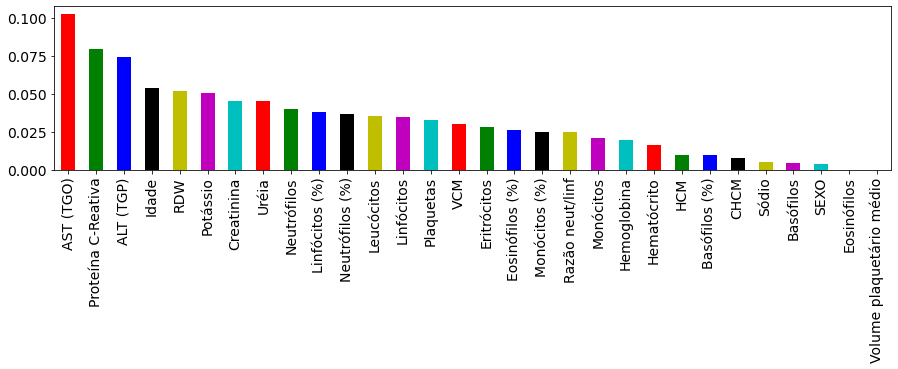

In [41]:
mi = pd.Series(mi)
mi.index = X_train.columns
mi=mi.sort_values(ascending = False)
my_colors = ['r', 'g', 'b', 'k', 'y', 'm', 'c']
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
mi.plot(kind='bar', color=my_colors, figsize=(15,3))
plt.show()

 A incidência de elevação de enzimas hepáticas, principalmente AST e ALT, em pacientes hospitalizados com Covid-19 varia de 14% a 53%, sendo ainda descrita a elevação discreta de bilirrubina total em até 10% dos casos.

FONTE: https://pebmed.com.br/covid-19-como-e-a-relacao-do-novo-coronavirus-com-o-figado/


### **CROSS VALIDATION**

### **AUC TODAS AS VARIÁVEIS**

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
import time
from imblearn.under_sampling import RandomUnderSampler

#faz o balanceamento das classes
under = RandomUnderSampler(sampling_strategy='majority',  )
X_train, y_train = under.fit_resample(X_train, y_train)

seed = 20

scorer = make_scorer(accuracy_score) # Teste outras

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)


gscv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

algorithms = {
    # testar sem hiperparâmetros
    'kNN':  GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MinMaxScaler(feature_range=(0, 1))),
            ('selector', VarianceThreshold()),
            ('knn', KNeighborsClassifier())]), 
        param_grid={
            'selector__threshold': [0, 0.01, 0.02, 0.03],
            'knn__n_neighbors': [1, 3, 5],
            'knn__p': [1, 2],
        },
        scoring='roc_auc',
        cv=gscv),
    'tree':  GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('tree', DecisionTreeClassifier(random_state=seed))]), 
        param_grid={
            'tree__max_depth': [5, 10, 20],
            'tree__criterion': ['entropy', 'gini'],
        },
        scoring='roc_auc',
        cv=gscv),
    'bigtree':  GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('tree', DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=seed))]), 
        param_grid={
            'tree__criterion': ['entropy', 'gini'],
        },
        scoring=scorer,
        cv=gscv),
    'svmlinear': GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('pca', PCA()),
            ('svm', SVC(kernel='linear', random_state=seed))]), 
        param_grid={
            'pca__n_components': [2, 5, 10],
            'svm__C': [1.0, 2.0],
        },
        scoring='roc_auc',
        cv=gscv),
    'svmrbf': GridSearchCV(
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('pca', PCA(random_state=seed)),
            ('svm', SVC(kernel='rbf', random_state=seed))]), 
        param_grid={
            'pca__n_components': [2, 5, 10],
            'svm__C': [1.0, 2.0],
            'svm__gamma': [0.1, 1.0, 2.0],
        },
        scoring='roc_auc',
        cv=gscv),
    'forest': GridSearchCV(  
        Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('rf', RandomForestClassifier(random_state=seed))]),
        param_grid={
            'rf__max_depth': [1, 5, 10],
            'rf__max_features': ["auto", "sqrt","log2"],
            'rf__n_estimators': [1, 100, 500],
        },
        scoring='roc_auc',
        cv=gscv),
}


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [43]:
ini = time.time()

from sklearn.model_selection import cross_val_score

result = {}
for alg, clf in algorithms.items():
  result[alg] = cross_val_score(clf, X_train, y_train, cv=cv)

result = pd.DataFrame.from_dict(result)
print(result)

fim = time.time()
print('\n')
print('Tempo de execução', round((fim - ini)/60, 4), 'minutos')

        kNN      tree   bigtree  svmlinear    svmrbf    forest
0  0.857708  0.820158  0.688889   0.841897  0.794466  0.948617
1  0.835968  0.891304  0.777778   0.851779  0.843874  0.934783
2  0.775692  0.829051  0.711111   0.812253  0.784585  0.911067
3  0.919960  0.878458  0.777778   0.907115  0.905138  0.962451
4  0.881423  0.903162  0.800000   0.895257  0.859684  0.976285
5  0.850791  0.836957  0.733333   0.812253  0.887352  0.911067
6  0.851240  0.861570  0.818182   0.925620  0.946281  0.942149
7  0.842975  0.861570  0.840909   0.896694  0.842975  0.952479
8  0.855372  0.774793  0.659091   0.853306  0.836777  0.904959
9  0.901860  0.867769  0.772727   0.921488  0.894628  0.938017


Tempo de execução 17.1043 minutos


In [44]:
#novo
result.apply(lambda x: "{:.2f} ± {:.2f}".format(x.mean(), x.std()))

kNN          0.86 ± 0.04
tree         0.85 ± 0.04
bigtree      0.76 ± 0.06
svmlinear    0.87 ± 0.04
svmrbf       0.86 ± 0.05
forest       0.94 ± 0.02
dtype: object

In [ ]:
#antigo
result.apply(lambda x: "{:.2f} ± {:.2f}".format(x.mean(), x.std()))

kNN          0.73 ± 0.06
tree         0.86 ± 0.05
bigtree      0.90 ± 0.01
svmlinear    0.83 ± 0.03
svmrbf       0.82 ± 0.04
dtype: object

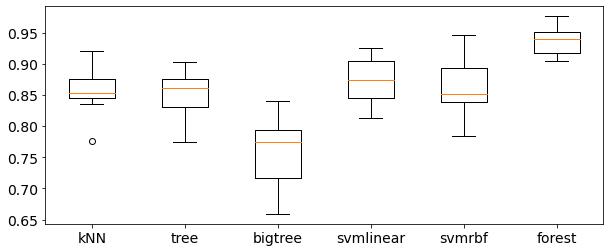

In [46]:
#novo
plt.boxplot([ scores for alg, scores in result.iteritems() ])
plt.xticks(1 + np.arange(result.shape[1]), result.columns)
plt.gcf().set_size_inches(10, 4)
plt.show()